### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [5]:
first_row = data.iloc[0]

# Print the entire first row
print(first_row)


missing_values = data.isnull()
total_missing = missing_values.sum()
print(total_missing)

length_of_dataframe = len(data)

# Print the length
print("Length of the DataFrame:", length_of_dataframe)

destination                      No Urgent Place
passanger                                  Alone
weather                                    Sunny
temperature                                   55
time                                         2PM
coupon                           Restaurant(<20)
expiration                                    1d
gender                                    Female
age                                           21
maritalStatus                  Unmarried partner
has_children                                   1
education               Some college - no degree
occupation                            Unemployed
income                           $37500 - $49999
car                                          NaN
Bar                                        never
CoffeeHouse                                never
CarryAway                                    NaN
RestaurantLessThan20                         4~8
Restaurant20To50                             1~3
toCoupon_GEQ5min    

3. Decide what to do about your missing data -- drop, replace, other...

In [6]:
data_cleaned=data.dropna(subset=['Y'])
print(data_cleaned)

           destination  passanger weather  temperature  time  \
0      No Urgent Place      Alone   Sunny           55   2PM   
1      No Urgent Place  Friend(s)   Sunny           80  10AM   
2      No Urgent Place  Friend(s)   Sunny           80  10AM   
3      No Urgent Place  Friend(s)   Sunny           80   2PM   
4      No Urgent Place  Friend(s)   Sunny           80   2PM   
...                ...        ...     ...          ...   ...   
12679             Home    Partner   Rainy           55   6PM   
12680             Work      Alone   Rainy           55   7AM   
12681             Work      Alone   Snowy           30   7AM   
12682             Work      Alone   Snowy           30   7AM   
12683             Work      Alone   Sunny           80   7AM   

                      coupon expiration  gender age      maritalStatus  ...  \
0            Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1               Coffee House         2h  Female  21  Unmarried partner  .

4. What proportion of the total observations chose to accept the coupon? 



In [7]:
accepted_rows = data_cleaned[data_cleaned['Y'] == 1]
denied_rows = data_cleaned[data_cleaned['Y'] == 0]

proportion_accepted = len(accepted_rows) / len(data_cleaned)
proportion_denied = len(denied_rows) / len(data_cleaned)

print(proportion_accepted)
print(proportion_denied)


0.5684326710816777
0.4315673289183223


5. Use a bar plot to visualize the `coupon` column.

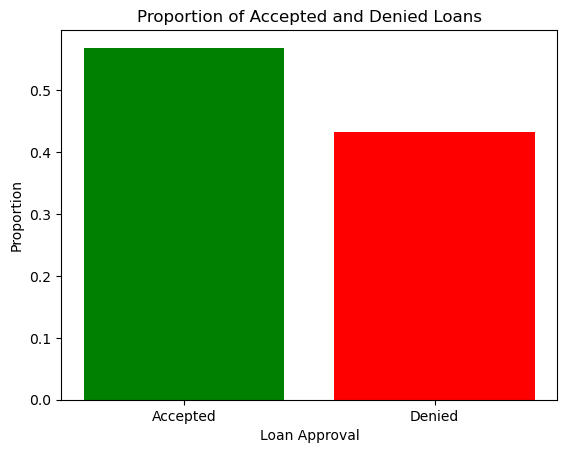

In [8]:
labels = ['Accepted', 'Denied']
proportions = [proportion_accepted, proportion_denied]

plt.bar(labels, proportions, color=['green', 'red'])
plt.xlabel('Loan Approval')
plt.ylabel('Proportion')
plt.title('Proportion of Accepted and Denied Loans')

# Show the plot
plt.show()

6. Use a histogram to visualize the temperature column.

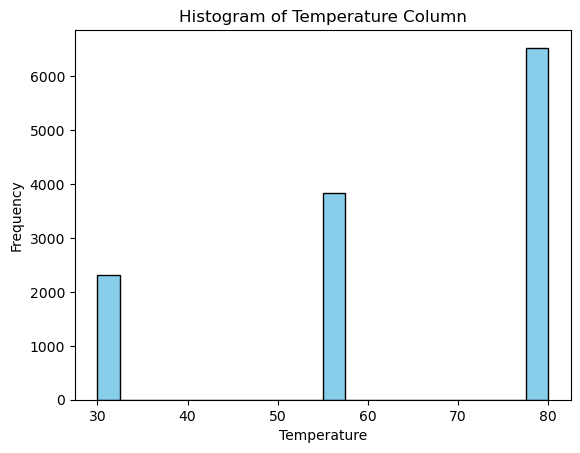

In [9]:
temperature_column = data_cleaned['temperature']

# Create a histogram
plt.hist(temperature_column, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Histogram of Temperature Column')

# Show the plot
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [10]:
bar_coupons_df = data_cleaned[data_cleaned['coupon'] == 'Bar'].copy()

# Print the new DataFrame containing just bar coupons
print(bar_coupons_df)

           destination  passanger weather  temperature  time coupon  \
9      No Urgent Place     Kid(s)   Sunny           80  10AM    Bar   
13                Home      Alone   Sunny           55   6PM    Bar   
17                Work      Alone   Sunny           55   7AM    Bar   
24     No Urgent Place  Friend(s)   Sunny           80  10AM    Bar   
35                Home      Alone   Sunny           55   6PM    Bar   
...                ...        ...     ...          ...   ...    ...   
12663  No Urgent Place  Friend(s)   Sunny           80  10PM    Bar   
12664  No Urgent Place  Friend(s)   Sunny           55  10PM    Bar   
12667  No Urgent Place      Alone   Rainy           55  10AM    Bar   
12670  No Urgent Place    Partner   Rainy           55   6PM    Bar   
12682             Work      Alone   Snowy           30   7AM    Bar   

      expiration  gender age      maritalStatus  ...  CoffeeHouse CarryAway  \
9             1d  Female  21  Unmarried partner  ...        never   

2. What proportion of bar coupons were accepted?


In [11]:
accepted_bar_coupons = bar_coupons_df[bar_coupons_df['Y'] == 1]

# Calculate the proportion
proportion_accepted_bar_coupons = len(accepted_bar_coupons) / len(bar_coupons_df)

# Print the proportion
print("Proportion of accepted bar coupons:", proportion_accepted_bar_coupons)

Proportion of accepted bar coupons: 0.41001487357461575


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [36]:
three_or_less = accepted_bar_coupons[accepted_bar_coupons['Bar'].isin(['never', 'less1', '1~3'])]
print(len(three_or_less))
three_or_more = accepted_bar_coupons[accepted_bar_coupons['Bar'].isin(['4~8', 'gt8'])]
print(len(three_or_more))

proportion_three_or_less = len(three_or_less)/len(accepted_bar_coupons)
proportion_three_or_more = len(three_or_more)/len(accepted_bar_coupons)
print(proportion_three_or_less)
print(proportion_three_or_more)

# Print the acceptance rates
# print("Acceptance rate for those who went to a bar 3 or fewer times a month:", acceptance_rate_3_or_less)
# print("Acceptance rate for those who went to a bar more than 3 times a month:", acceptance_rate_3_or_more)

666
153
0.8053204353083434
0.18500604594921402


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [39]:
accepted_bar_coupons['age'] = pd.to_numeric(accepted_bar_coupons['age'], errors='coerce')
bar_more_than_once_and_over_25_df = accepted_bar_coupons[(accepted_bar_coupons['Bar'].isin(['1-3','4~8', 'gt8'])) & (accepted_bar_coupons['age'] > 25)].copy()

# Calculate the acceptance rate for drivers who go to a bar more than once a month and are over the age of 25
acceptance_rate_over_25 = len(bar_more_than_once_and_over_25_df)/len(accepted_bar_coupons)

# Calculate the acceptance rate for all others

# Print the acceptance rates
print("Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25:", acceptance_rate_over_25)



Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25: 0.11366384522370013


/var/folders/8d/zxg419mx72s7xgfv8kf1820w0000gn/T/ipykernel_11448/1438416590.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accepted_bar_coupons['age'] = pd.to_numeric(accepted_bar_coupons['age'], errors='coerce')


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [41]:
unique_passenger = accepted_bar_coupons['passanger'].unique()
print(unique_passenger)

filtered_df = accepted_bar_coupons[
    (accepted_bar_coupons['Bar'].isin(['1~3','4~8', 'gt8'])) &
    (accepted_bar_coupons['passanger'] != 'Kid(s)') &
    (accepted_bar_coupons['occupation'] != 'farming') &
    (accepted_bar_coupons['occupation'] != 'fishing') &
    (accepted_bar_coupons['occupation'] != 'forestry')
].copy()

acceptance_rate_filtered = len(filtered_df)/len(accepted_bar_coupons)
print(acceptance_rate_filtered)

['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
0.4752116082224909


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [42]:

unique_maritalStatus = accepted_bar_coupons['maritalStatus'].unique()
print(unique_maritalStatus)

filtered_maritalStatus = accepted_bar_coupons[
    (accepted_bar_coupons['Bar'].isin(['1~3','4~8', 'gt8'])) &
    (accepted_bar_coupons['passanger'] != 'Kid(s)') &
    (accepted_bar_coupons['maritalStatus'] != 'Widowed')
].copy()

acceptance_rate_filtered_maritalStatus = len(filtered_maritalStatus)/len(accepted_bar_coupons)
print(acceptance_rate_filtered_maritalStatus)


filtered_under30 = accepted_bar_coupons[
    (accepted_bar_coupons['Bar'].isin(['1~3','4~8', 'gt8'])) &
    (accepted_bar_coupons['age'] <30 )
].copy()

acceptance_rate_filtered_uder30 = len(filtered_under30)/len(accepted_bar_coupons)
print(acceptance_rate_filtered_uder30)




['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
0.4752116082224909
0.2962515114873035


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
I can hypothesize based on these results the acceptance rate is much higher amongst drivers without kids as passengers.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [50]:
filtered_under30_with_kids = accepted_bar_coupons[
    (accepted_bar_coupons['Bar'].isin(['1~3','4~8', 'gt8'])) &
    (accepted_bar_coupons['age'] <30 ) &
    (accepted_bar_coupons['passanger'] =='Kid(s)')
].copy()

acceptance_rate_filtered_under30_with_kids = len(filtered_under30_with_kids)/len(accepted_bar_coupons)
print(acceptance_rate_filtered_under30_with_kids)

filtered_under30_no_kids = accepted_bar_coupons[
    (accepted_bar_coupons['Bar'].isin(['1~3','4~8', 'gt8'])) &
    (accepted_bar_coupons['age'] <30 ) &
    (accepted_bar_coupons['passanger'] !='Kid(s)')
].copy()

acceptance_rate_filtered_under30_no_kids = len(filtered_under30_no_kids)/len(accepted_bar_coupons)
print(acceptance_rate_filtered_under30_no_kids)

0.008464328899637243
0.2877871825876663
